In [16]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#Create dataset
df = pd.DataFrame({
    "order_id": [1001, 1002, 1003, 1004, 1005, 1006],
    "customer": ["Aya", "Omar", "Aya", "Lina", None, "Omar"],
    "product": ["lipstick", "eyeliner", "foundation", "lipstick", "perfume", "foundation"],
    "price": [10, 7, 25, 10, 40, None],
    "quantity": [2, 3, 1, None, 1, 2],
    "category": ["makeup", "makeup", "makeup", "makeup", "fragrance", "makeup"]
})


In [18]:
#inspect the data
print(df.head())
print(df.info())
print(df.describe())

   order_id customer     product  price  quantity   category
0      1001      Aya    lipstick   10.0       2.0     makeup
1      1002     Omar    eyeliner    7.0       3.0     makeup
2      1003      Aya  foundation   25.0       1.0     makeup
3      1004     Lina    lipstick   10.0       NaN     makeup
4      1005     None     perfume   40.0       1.0  fragrance
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  6 non-null      int64  
 1   customer  5 non-null      object 
 2   product   6 non-null      object 
 3   price     5 non-null      float64
 4   quantity  5 non-null      float64
 5   category  6 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 420.0+ bytes
None
          order_id      price  quantity
count     6.000000   5.000000   5.00000
mean   1003.500000  18.400000   1.80000
std       1.870829  13.974978 

0    10.0
1     7.0
2    25.0
3    10.0
4    40.0
5    18.4
Name: price, dtype: float64
category
fragrance     40.0
makeup       102.8
Name: total_revenue, dtype: float64
customer
Aya        45.0
Lina        0.0
Omar       57.8
unknown    40.0
Name: total_revenue, dtype: float64


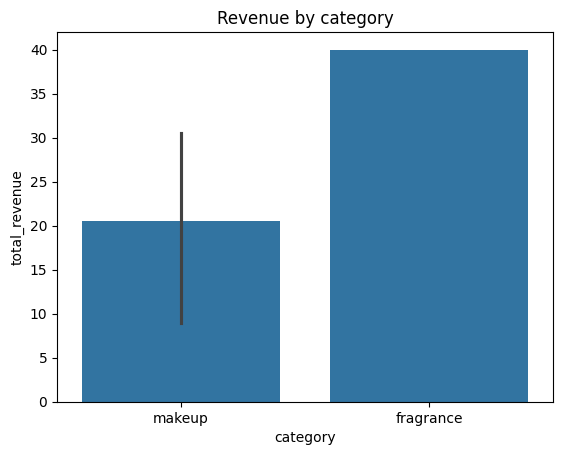

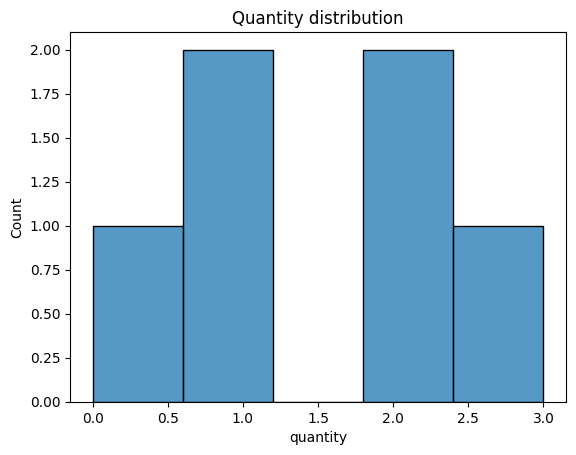

In [19]:
# clean the data

#fill missing customer
df['customer'] = df['customer'].fillna('unknown')

#fill missing quantity with 0
df['quantity'] = df['quantity'].fillna(0)

#fill missing price with mean
df['price'] = df['price'].fillna(df['price'].mean())
print(df['price'])

#Add a new column: total revenue per order
df['total_revenue'] = df['price'] * df['quantity']

#which category makes more money (revenue per category)
print(df.groupby('category')['total_revenue'].sum())

#which customer spends the most (revenue per customer)
print(df.groupby('customer')['total_revenue'].sum())

#visualization: revenue per category
sns.barplot(x=df['category'], y=df['total_revenue'])
plt.title('Revenue by category')
plt.show()

#visualization: quantity distribution
sns.histplot(df['quantity'], bins=5)
plt.title('Quantity distribution')
plt.show()

In [20]:
# Export clean data
df.to_csv('clean_data.csv', index=False)